In [1]:
!pip install elasticsearch

  Using cached elasticsearch-8.6.2-py3-none-any.whl (385 kB)
  Using cached elastic_transport-8.4.0-py3-none-any.whl (59 kB)


### Get index name

In [14]:
from elasticsearch import Elasticsearch
es = Elasticsearch(hosts= "http://192.168.120.185:9200")
es.ping()

C:\Users\Microsoft\AppData\Local\Temp\ipykernel_10232\10565109.py:3: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.16/security-minimal-setup.html to enable security.
  es.ping()


True

### Query string DSL

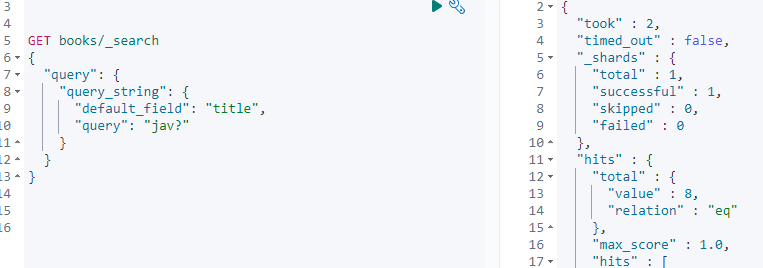

In [24]:
query = {
            "query_string": {
                "default_field": "title",
                "query": "jav?"
            }    
        }

data_search = es.search(index="books", query=query)
data_search = data_search['hits']['hits']
print("The number of",len(data_search))

for i in data_search:
    print("title :", i['_source']['title'])

The number of 8
title : Core Java Volume I – Fundamentals
title : Effective Java
title : Java: A Beginner’s Guide
title : Java - The Complete Reference
title : Head First Java
title : Java Concurrency in Practice
title : Test-Driven: TDD and Acceptance TDD for Java Developers
title : Java Performance: The Definite Guide


C:\Users\Microsoft\AppData\Local\Temp\ipykernel_10232\1051264403.py:8: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.16/security-minimal-setup.html to enable security.
  data_search = es.search(index="books", query=query)


### Create Index

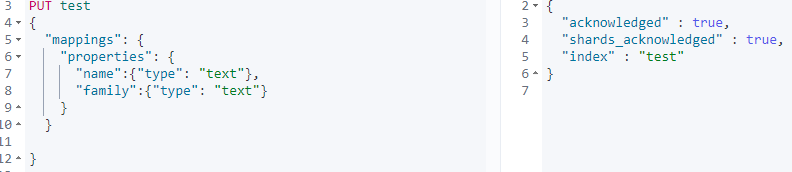

In [29]:
result = es.indices.create(index="test", mappings={
        "properties":
        {"name":{"type":"text"},
         "family":{"type":"text"}
        }
   })
    
print(result['acknowledged'])

True


C:\Users\Microsoft\AppData\Local\Temp\ipykernel_10232\2191924717.py:1: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.16/security-minimal-setup.html to enable security.
  result = es.indices.create(index="test", mappings={


### Add document

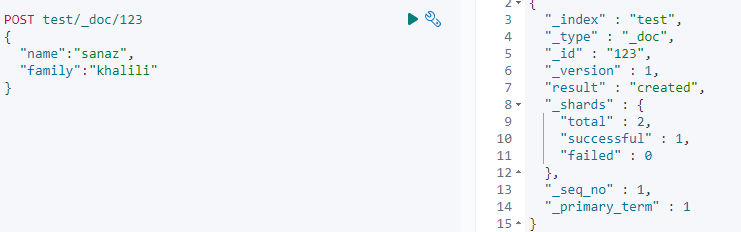

In [33]:
res = es.index(index="test", id=123, document={"name":"sanaz" ,"family":"khalili"})
res

C:\Users\Microsoft\AppData\Local\Temp\ipykernel_10232\2959717011.py:1: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.16/security-minimal-setup.html to enable security.
  res = es.index(index="test", id=123, document={"name":"sanaz" ,"family":"khalili"})


ObjectApiResponse({'_index': 'test', '_type': '_doc', '_id': '123', '_version': 1, 'result': 'created', '_shards': {'total': 2, 'successful': 1, 'failed': 0}, '_seq_no': 0, '_primary_term': 1})